# 05_associations_gtdbtk

This document explores the phylogenetic make-up of identified MAGs with associated viruses. The data loaded is all_host_association.csv (created with 01 R script) and all_mag_gtdb.csv (created with 03 Jupyter notebook).

## Load packages and data

In [1]:
import pandas as pd
import os
import sys
import csv
import numpy as np
import matplotlib
import glob
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt

associations = pd.read_csv('~/Documents/Bigelow- starting Sept 2022/Virus Project/OMZ_MH_Analysis/Data/proximeta_viral_files/all_host_associations.csv')
mags = jv154_bac = pd.read_csv('~/Documents/Bigelow- starting Sept 2022/Virus Project/OMZ_MH_Analysis/Data/mag_data/all_mag_gtdb.csv')
mags.rename(columns={'user_genome':'host_name'}, inplace=True) # rename user_genome column to match associations data frame

## Merge host association data with gtdbtk data

In [2]:
combo = associations.merge(mags,how='left',on=["host_name","sample_name","sample_depth"])
combo = combo.fillna("NA")
combo

,virus_name,virus_length,virus_read_count,virus_read_depth,virus_read_depth_in_host,host_name,host_length,host_read_count,host_read_depth,intra_read_count,...,translation_table,red_value,warnings,domain,phyla,class,order,family,genus,species
0,k141_30505,6674,91,13.635001,4.999501,bin_165,176803,3432,19.411435,166,...,NA,NA,Insufficient number of amino acids in MSA (1.6%),Unclassified Bacteria,NA,NA,NA,NA,NA,NA
1,k141_2024815,6453,100,15.496668,10.044137,bin_35,2800912,46716,16.678853,7992,...,11.0,NA,NA,Bacteria,Pseudomonadota,Alphaproteobacteria,Caulobacterales,Hyphomonadaceae,Henriciella,Henriciella pelagia
2,k141_554695,6107,49,8.023579,3.343158,bin_53,1619275,12799,7.904155,538,...,11.0,0.9941,Genome not assigned to closest species as it f...,Bacteria,Nitrospinota,CAJXCL01,CAJXCL01,CAJXCL01,CAJXCL01,NA
3,k141_1008272,9439,446,47.250768,5.625091,bin_5,6683291,199608,29.866723,3598,...,11.0,0.99969,"Genome domain questionable ( 25.8% Bacterial, ...",Archaea,Thermoplasmatota,Poseidoniia,MGIII,CG-Epi1,UBA8886,NA
4,k141_2878208,6018,80,13.293453,9.795176,bin_9,4907602,94765,19.309838,17780,...,11.0,0.76892,NA,Bacteria,Myxococcota,Polyangia,Polyangiales,Polyangiaceae,NA,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,vMAG_28,19811,256,12.922114,0.646106,bin_24,2974822,17871,6.007418,323,...,11.0,NA,NA,Bacteria,Pseudomonadota,Alphaproteobacteria,GCA-2731375,GCA-2731375,GCA-2731375,GCA-2731375 sp002731375
332,vMAG_11,12392,755,60.926404,1.249772,bin_26,2922201,11622,3.977139,1037,...,11.0,NA,NA,Bacteria,Pseudomonadota,Gammaproteobacteria,Pseudomonadales,Pseudohongiellaceae,UBA9145,UBA9145 sp002730035
333,vMAG_44,67417,9735,144.399780,98.904902,bin_1,9896228,4482963,452.997142,1398908,...,11.0,NA,NA,Bacteria,Planctomycetota,Planctomycetia,Pirellulales,Pirellulaceae,ARS98,ARS98 sp002685655
334,vMAG_46,23788,4761,200.142929,167.987002,bin_1,9896228,4482963,452.997142,1398908,...,11.0,NA,NA,Bacteria,Planctomycetota,Planctomycetia,Pirellulales,Pirellulaceae,ARS98,ARS98 sp002685655


In [3]:
# write csv file
combo.to_csv('~/Documents/Bigelow- starting Sept 2022/Virus Project/OMZ_MH_Analysis/Data/all_associations_gtdb.csv', index=False)

## How many associations were classified in total?

In [4]:
tot = len(combo['domain'])
tot

336

## How many MAGs were classified to at least that classification level?

In [5]:
d_assoc = len(combo[combo['domain']!= "NA"])
p_assoc = len(combo[combo['phyla']!="NA"])
c_assoc =len(combo[combo['class']!="NA"])
o_assoc=len(combo[combo['order']!="NA"])
f_assoc=len(combo[combo['family']!="NA"])
g_assoc=len(combo[combo['genus']!="NA"]) 
s_assoc=len(combo[combo['species']!="NA"])

# create a data frame of the number of MAGs associated with each level
dict_assoc = {'tax_level': ['total', 'domain', 'phyla', 'class', 'order', 'family', 'genus','species'], 'num_associations_classified':
   [tot, d_assoc, p_assoc, c_assoc, o_assoc, f_assoc, g_assoc, s_assoc]}
GTDB_assoc = pd.DataFrame(data = dict_assoc)

# add a column to the dataframe that is the percent of MAGs
GTDB_assoc['percent_classified']=GTDB_assoc['num_associations_classified']/tot*100

GTDB_assoc

,tax_level,num_associations_classified,percent_classified
0,total,336,100.000000
1,domain,336,100.000000
2,phyla,196,58.333333
3,class,196,58.333333
4,order,196,58.333333
5,family,196,58.333333
6,genus,166,49.404762
7,species,129,38.392857


Text(0.5, 1.0, 'Assignment of host-virus associations at different taxonomic levels with GTDB')

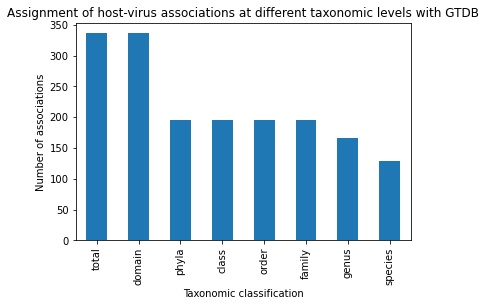

In [7]:
# count plot
GTDB_assoc.plot(kind='bar', x='tax_level', y='num_associations_classified',legend=None)
plt.xlabel('Taxonomic classification')
plt.ylabel('Number of associations')
plt.title('Assignment of host-virus associations at different taxonomic levels with GTDB')

Text(0.5, 1.0, 'Percent of virus-host associations classified at different taxonomic levels with GTDB')

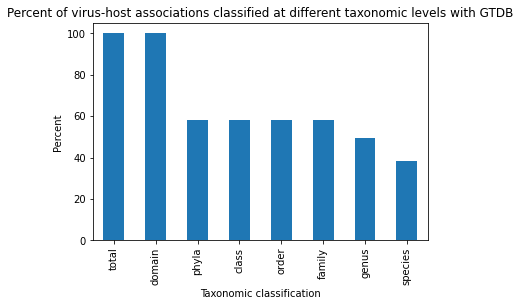

In [8]:
# percent plot
GTDB_assoc.plot(kind='bar', x='tax_level', y='percent_classified',legend=None)
plt.xlabel('Taxonomic classification')
plt.ylabel('Percent')
plt.title('Percent of host-virus associations classified at different taxonomic levels with GTDB')

## What are the most common classifications?

#### Phyla

Text(0.5, 1.0, 'Number of host-virus associations belonging to the top 10 most abundant phyla with GTDB')

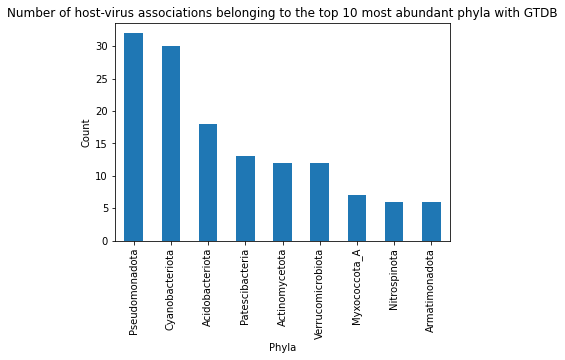

In [22]:
phyla_df = combo.groupby('phyla', as_index=False)['host_name'].count().sort_values(by = 'host_name',ascending=False)
top_phyla = phyla_df [:11]
top_phyla = top_phyla [2:11]

top_phyla.plot('phyla','host_name',kind = 'bar',legend=None)
plt.xlabel('Phyla')
plt.ylabel('Count')
plt.title('Number of host-virus associations belonging to the top 10 most abundant phyla with GTDB')

#### Class

Text(0.5, 1.0, 'Number of host-virus associations belonging to the top 10 most abundant classes with GTDB')

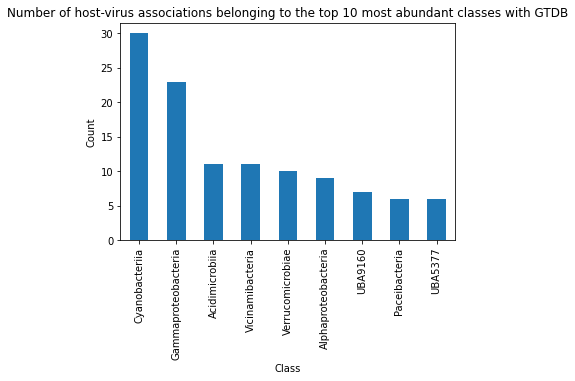

In [29]:
class_df = combo.groupby('class', as_index=False)['host_name'].count().sort_values(by = 'host_name',ascending=False)
top_class = class_df [:11]
top_class = top_class [2:11]

top_class.plot('class','host_name',kind = 'bar',legend=None)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Number of host-virus associations belonging to the top 10 most abundant classes with GTDB')

#### Order

Text(0.5, 1.0, 'Number of host-virus associations belonging to the top 10 most abundant orders with GTDB')

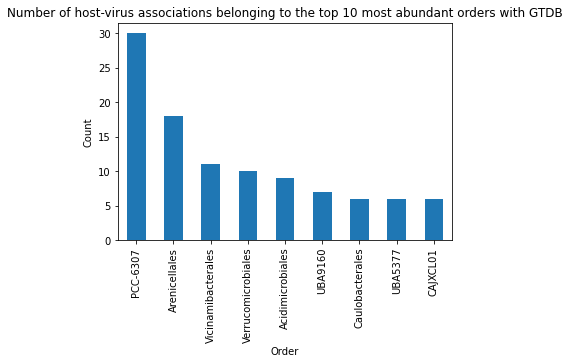

In [33]:
order_df = combo.groupby('order', as_index=False)['host_name'].count().sort_values(by = 'host_name',ascending=False)
top_order = order_df [:11]
top_order = top_order [2:11]

top_order.plot('order','host_name',kind = 'bar',legend=None)
plt.xlabel('Order')
plt.ylabel('Count')
plt.title('Number of host-virus associations belonging to the top 10 most abundant orders with GTDB')